In [34]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
directory_path = "../Data/"
folders = []
for i in os.listdir(directory_path) :
    folders.append(i)
print(folders)
count = 0 
for folder in os.listdir(directory_path) :
    directory_new_path = directory_path + folder 
    for file  in os.listdir(directory_new_path) :
        directory_new_path = directory_new_path  + "/" +  file  
        if  not file.endswith(('.png', '.jpg', '.jpeg', 'bmp')) :
            os.remove(directory_new_path)
            
            count +=1
        
print(count)
classes = {}
print("the total images in each class")
dataset_path = Path("../Data/")
for i in folders  :
    classes[i] = len(list((dataset_path/i).glob("*")))
    print(i , " : "  ,len(list((dataset_path/i).glob("*"))))

['Benign', 'early Pre-B', 'Pre-B', 'Pro-B']
0
the total images in each class
Benign  :  512
early Pre-B  :  979
Pre-B  :  955
Pro-B  :  796


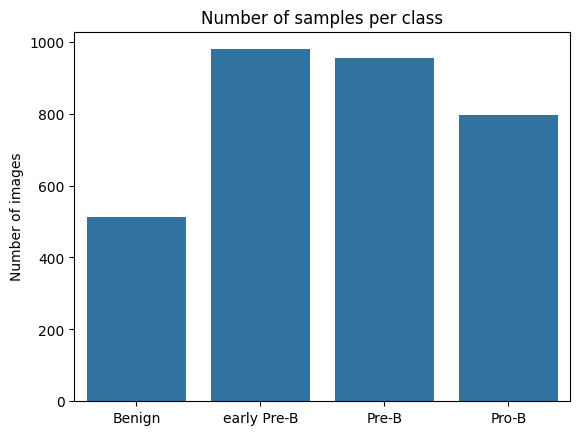

In [35]:
sns.barplot(x=list(classes.keys()), y=list(classes.values()))
plt.ylabel("Number of images")
plt.title("Number of samples per class")
plt.show()